<a href="https://colab.research.google.com/github/NataGoto/predictive-maintenance/blob/main/Pumps_111_3_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание по кластеризации аномалий**

**Выходят за критические уставки вибрации кластеры -1, 7,9, очень сильно - 10, за повышенное давление 1,0,2,3,5,6,7,8,9,10,11,12, 13, за критическое давление -1,0,2,3,5,6,7,8,9,10,11.**

**Посмотрим, что происходит во время промывки насосов на ТО**

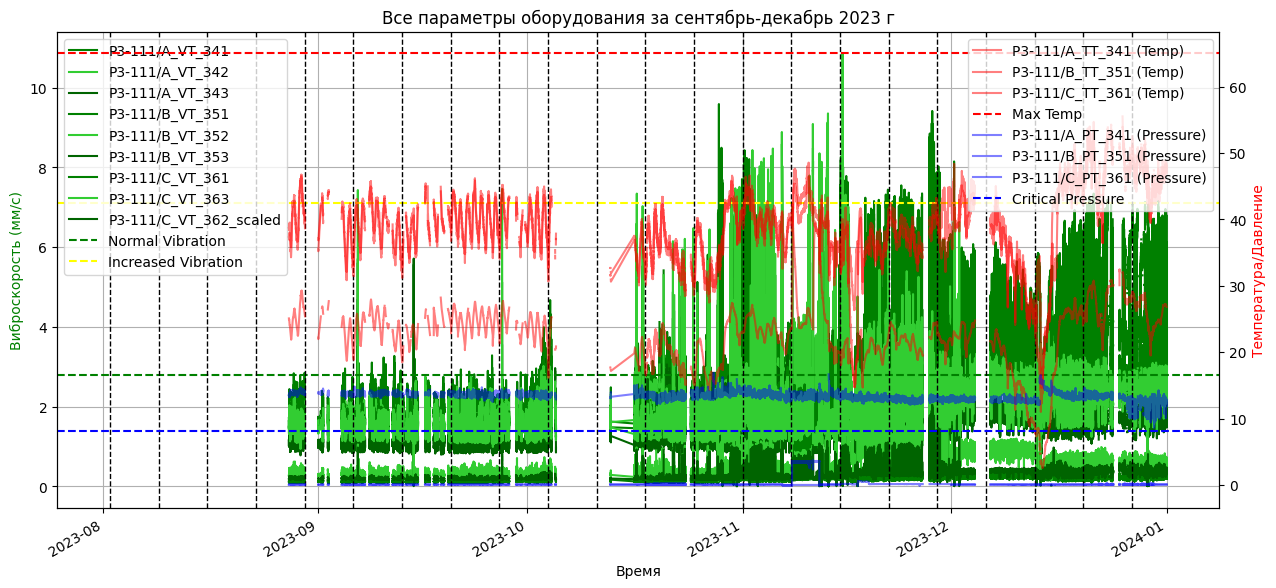

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Данные для загрузки
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_scaled_no353.csv')
data['time'] = pd.to_datetime(data['time'])  # Конвертация времени

# Уставки
normal_vibration = 2.8
increased_vibration = 7.1
max_temp = 65
max_pressure = 8.1

# Даты технического обслуживания
maintenance_dates = [
    "2023-08-02", "2023-08-09", "2023-08-16", "2023-08-23", "2023-08-30",
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27",
    "2023-10-04", "2023-10-11", "2023-10-18", "2023-10-25",
    "2023-11-01", "2023-11-08", "2023-11-15", "2023-11-22", "2023-11-29",
    "2023-12-06", "2023-12-13", "2023-12-20", "2023-12-27"
]

# Создание графика
fig, ax1 = plt.subplots(figsize=(15, 7))

# Визуализация данных виброскорости
colors = ['green', 'limegreen', 'darkgreen']  # разные оттенки зеленого для виброскорости
vibration_sensors = [col for col in data.columns if 'VT' in col]
for i, col in enumerate(vibration_sensors):
    ax1.plot(data['time'], data[col], label=f"{col}", color=colors[i % len(colors)])

# Добавление уставок виброскорости
ax1.axhline(y=normal_vibration, color='green', linestyle='--', label='Normal Vibration')
ax1.axhline(y=increased_vibration, color='yellow', linestyle='--', label='Increased Vibration')

# Ось для температуры (двойная ось Y)
ax2 = ax1.twinx()
temperature_sensors = [col for col in data.columns if 'TT' in col]
for col in temperature_sensors:
    ax2.plot(data['time'], data[col], label=f"{col} (Temp)", color='red', alpha=0.5)

# Добавление уставок температуры
ax2.axhline(y=max_temp, color='red', linestyle='--', label='Max Temp')

# Ось для давления (PT)
pressure_sensors = [col for col in data.columns if 'PT' in col]
for col in pressure_sensors:
    ax2.plot(data['time'], data[col], label=f"{col} (Pressure)", color='blue', alpha=0.5)

# Добавление уставок давления
ax2.axhline(y=max_pressure, color='blue', linestyle='--', label='Critical Pressure')

# Добавление вертикальных линий для дат технического обслуживания
for date in maintenance_dates:
    ax1.axvline(pd.to_datetime(date), color='black', linestyle='--', linewidth=1)

# Дополнительные настройки графика
ax1.set_title('Все параметры оборудования за сентябрь-декабрь 2023 г')
ax1.set_xlabel('Время')
ax1.set_ylabel('Виброскорость (мм/с)', color='green')
ax2.set_ylabel('Температура/Давление', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Форматирование даты на оси X
plt.gcf().autofmt_xdate()

# Показать график
plt.show()


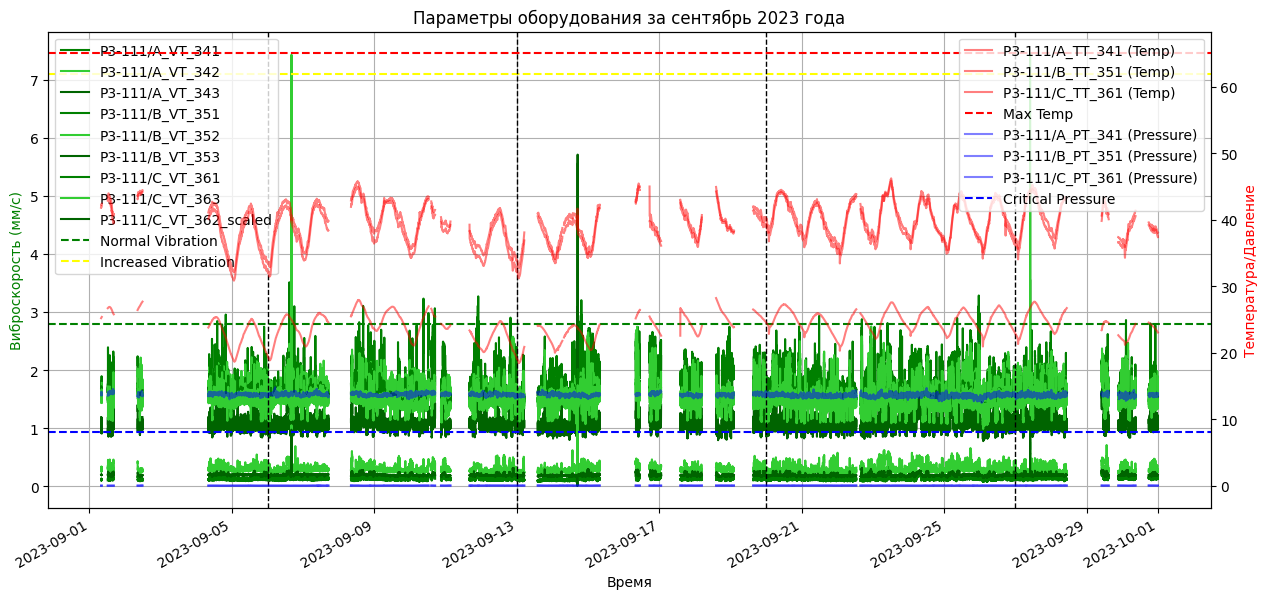

In [ ]:
#Уменьшим график до одного месячца.
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_scaled_no353.csv')
data['time'] = pd.to_datetime(data['time'])  # Конвертация времени

# Фильтрация данных за сентябрь 2023 года
data = data[(data['time'] >= '2023-09-01') & (data['time'] < '2023-10-01')]

# Уставки
normal_vibration = 2.8
increased_vibration = 7.1
max_temp = 65
max_pressure = 8.1

# Даты технического обслуживания в сентябре
maintenance_dates = [
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27"
]

# Создание графика
fig, ax1 = plt.subplots(figsize=(15, 7))

# Визуализация данных виброскорости
colors = ['green', 'limegreen', 'darkgreen']  # разные оттенки зеленого для виброскорости
vibration_sensors = [col for col in data.columns if 'VT' in col]
for i, col in enumerate(vibration_sensors):
    ax1.plot(data['time'], data[col], label=f"{col}", color=colors[i % len(colors)])

# Добавление уставок виброскорости
ax1.axhline(y=normal_vibration, color='green', linestyle='--', label='Normal Vibration')
ax1.axhline(y=increased_vibration, color='yellow', linestyle='--', label='Increased Vibration')

# Ось для температуры (двойная ось Y)
ax2 = ax1.twinx()
temperature_sensors = [col for col in data.columns if 'TT' in col]
for col in temperature_sensors:
    ax2.plot(data['time'], data[col], label=f"{col} (Temp)", color='red', alpha=0.5)

# Добавление уставок температуры
ax2.axhline(y=max_temp, color='red', linestyle='--', label='Max Temp')

# Ось для давления (PT)
pressure_sensors = [col for col in data.columns if 'PT' in col]
for col in pressure_sensors:
    ax2.plot(data['time'], data[col], label=f"{col} (Pressure)", color='blue', alpha=0.5)

# Добавление уставок давления
ax2.axhline(y=max_pressure, color='blue', linestyle='--', label='Critical Pressure')

# Добавление вертикальных линий для дат технического обслуживания
for date in maintenance_dates:
    ax1.axvline(pd.to_datetime(date), color='black', linestyle='--', linewidth=1)

# Дополнительные настройки графика
ax1.set_title('Параметры оборудования за сентябрь 2023 года')
ax1.set_xlabel('Время')
ax1.set_ylabel('Виброскорость (мм/с)', color='green')
ax2.set_ylabel('Температура/Давление', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Форматирование даты на оси X
plt.gcf().autofmt_xdate()

# Показать график
plt.show()


**Мы видим, что показатели  падают ровно в даты ТО.**

**Словарь классов режимов работы насосов 111**

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_clusters_reassigned.csv')
data['time'] = pd.to_datetime(data['time'])

# Даты промывки
wash_dates = [
    "2023-08-02", "2023-08-09", "2023-08-16", "2023-08-23", "2023-08-30",
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27",
    "2023-10-04", "2023-10-11", "2023-10-18", "2023-10-25",
    "2023-11-01", "2023-11-08", "2023-11-15", "2023-11-22", "2023-11-29",
    "2023-12-06", "2023-12-13", "2023-12-20", "2023-12-27"
]

# Отметка дней промывки в данных
data['is_wash_day'] = data['time'].dt.date.isin(pd.to_datetime(wash_dates).date)

# Отображение для классов
class_map = {
    0: "normal high pressure",
    1: "sensors out of service",
    2: "normal basic",
    -1: "exclude from analysis",
    3: "alert vibration",
    4: "moderate operation with sensor failures",
    5: "normal operation with occasional pressure peaks",
    6: "monitoring mode",
    7: "enhanced monitoring mode",
    8: "brief operational pauses",
    9: "high operational stress",
    10: "deep fluctuation tt and vt",
    11: "active synchro fluctuation of tt, vt, pt",
    12: "stopping",
    13: "short break"
}

# Присвоение класса с учетом дней промывки
data['class'] = data['cluster'].map(class_map)

# Сохранение обновленных данных
data.to_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_with_wash.csv', index=False)



**Удаляем кластер (класс) с выбросами**

In [ ]:
import pandas as pd
import numpy as np

# Загрузка данных
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_with_wash.csv')
data['time'] = pd.to_datetime(data['time'])

# Замена inf и NaN на -1 перед конвертацией в int
data['cluster'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['cluster'].fillna(-1, inplace=True)
data['cluster'] = data['cluster'].astype(int)

# Удаление записей с кластером -1
data = data[data['cluster'] != -1]

# Сохранение данных без кластера -1
data.to_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_filtered.csv', index=False)


**Проверяем, удалился ли мусорный класс, заменяем нан**

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_filtered.csv')
data['time'] = pd.to_datetime(data['time'])

# Замена NaN значений на -1 (теперь это можно сделать, так как кластер -1 уже удален)
data.fillna(-1, inplace=True)

# Отметка дней промывки в данных
wash_dates = [
    "2023-08-02", "2023-08-09", "2023-08-16", "2023-08-23", "2023-08-30",
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27",
    "2023-10-04", "2023-10-11", "2023-10-18", "2023-10-25",
    "2023-11-01", "2023-11-08", "2023-11-15", "2023-11-22", "2023-11-29",
    "2023-12-06", "2023-12-13", "2023-12-20", "2023-12-27"
]
data['is_wash_day'] = data['time'].dt.date.isin(pd.to_datetime(wash_dates).date)

# Сохранение обновленных данных
data.to_csv(r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv', index=False)

# Проверка уникальных классов (если нужно убедиться, что в данные не вкралась ошибка)
print("Уникальные классы в 'cluster':", data['cluster'].unique())


Уникальные классы в 'cluster': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


**Функция для определения дня промывки**

In [ ]:
import pandas as pd

def is_wash_day(date, wash_day='Wednesday'):
    # Преобразование строки в datetime, если это необходимо
    if isinstance(date, str):
        date = pd.to_datetime(date)
    # Возвращает True, если день недели совпадает с днем промывки
    return date.day_name() == wash_day

# Пример использования
test_date = '2023-08-02'  # Пример даты, которая должна быть проверена
print(is_wash_day(test_date))  # Выводит True или False в зависимости от дня недели


True


**Тренировка на LSTM модели. Из всех вариантов выбрана именно эта нейронка за успешную работу на временных рядах с перерывами**

Shape of X_train_seq: (140605, 60, 15)
Shape of y_train_seq: (140605,)


c:\Users\Admin\Desktop\myenv3.10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - accuracy: 0.9224 - loss: 0.2664 - val_accuracy: 0.9972 - val_loss: 0.0129
Epoch 2/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - accuracy: 0.9976 - loss: 0.0115 - val_accuracy: 0.9988 - val_loss: 0.0072
Epoch 3/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 4/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 5/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 6/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 7/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 8/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 

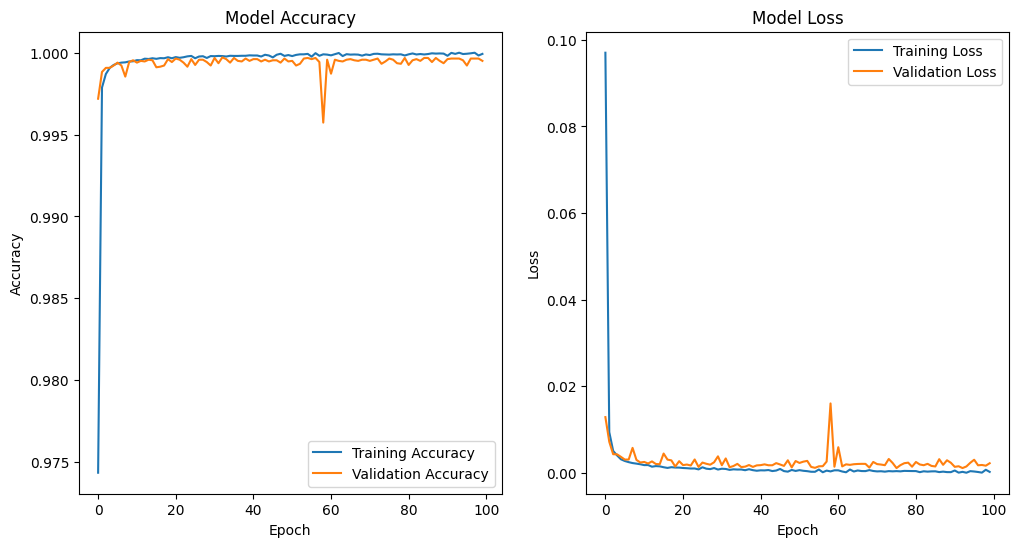

In [ ]:
# версия 1
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)

# Выбор фичей и таргета
features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Отметка дней промывки в данных
wash_dates = [
    "2023-08-02", "2023-08-09", "2023-08-16", "2023-08-23", "2023-08-30",
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27",
    "2023-10-04", "2023-10-11", "2023-10-18", "2023-10-25",
    "2023-11-01", "2023-11-08", "2023-11-15", "2023-11-22", "2023-11-29",
    "2023-12-06", "2023-12-13", "2023-12-20", "2023-12-27"
]
wash_dates_dt = pd.to_datetime(wash_dates)
data['is_wash_day'] = pd.Index(data.index.date).isin(wash_dates_dt.date)

# Индикатор для датчиков вне сервиса
data['sensors_out_of_service'] = (data['cluster'] == 1).astype(int)

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Определение длины последовательности для LSTM
sequence_length = 60

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)

def create_sequences(X, y, timestamps, sequence_length=60):
    xs, ys, ts = [], [], []
    for i in range(len(X) - sequence_length + 1):
        xs.append(X.iloc[i:i + sequence_length].values)
        ys.append(y.iloc[i + sequence_length - 1])
        ts.append(timestamps[i + sequence_length - 1])
    return np.array(xs), np.array(ys), np.array(ts)

X_train_seq, y_train_seq, train_timestamps = create_sequences(X_train, y_train, timestamps_train, sequence_length=60)
X_test_seq, y_test_seq, test_timestamps = create_sequences(X_test, y_test, timestamps_test, sequence_length=60)

print("Shape of X_train_seq:", X_train_seq.shape)  # Должно выводить (None, 60, 15)
print("Shape of y_train_seq:", y_train_seq.shape)  # Должно выводить (None,)

# Модель
model = Sequential([
    LSTM(50, input_shape=(sequence_length, len(features)), return_sequences=True),
    LSTM(50),
    Dense(len(np.unique(y_train)), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Обучение модели
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    validation_split=0.2
)


# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Сохранение модели
save_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_sensors_out_of_service.keras'
model.save(save_path)


In [ ]:
# Как правильно указывать форму для более чистого кода
# from keras.layers import Input
# Модель
'''model = Sequential([
    Input(shape=(sequence_length, len(features))),  # Явное указание формы ввода
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(len(np.unique(y_train_seq)), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])'''


**Предикт - выделены алертные классы режимов работы и нормальные.**

In [ ]:
import pandas as pd
import plotly.express as px

# Создаем DataFrame для удобства анализа
results_df = pd.DataFrame({
    'predicted_class': predicted_classes
})

# Подсчет количества каждого класса
class_counts = results_df['predicted_class'].value_counts().sort_index()
print(class_counts)

# Визуализация
fig = px.bar(class_counts, title='Distribution of Predicted Classes', labels={'index': 'Class', 'value': 'Count'}, text_auto=True)
fig.update_layout(xaxis_title='Class', yaxis_title='Count')
fig.show()


predicted_class
0    29695
1     5182
4      216
9       14
Name: count, dtype: int64


**Распределение классов фактическое**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)

features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)


# Подсчет количества каждого класса в обучающей и тестовой выборках
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Вывод результатов
print("Распределение классов в обучающей выборке:")
print(train_counts)
print("\nРаспределение классов в тестовой выборке:")
print(test_counts)


Распределение классов в обучающей выборке:
cluster
0     84148
1     33054
2         8
3         4
4       519
5       146
6       102
7        77
8         8
9     21855
10       41
11      695
12        1
13        6
Name: count, dtype: int64

Распределение классов в тестовой выборке:
cluster
0     21047
1      8145
2         8
3         1
4       139
5        32
6        20
7        23
8         1
9      5572
10        8
11      167
12        3
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Визуализация распределения предсказанных классов
fig = px.bar(
    class_counts.reset_index(),
    x='predicted_class',
    y='count',
    title='Distribution of Predicted Classes',
    labels={'predicted_class': 'Class', 'count': 'Count'},
    text='count'
)
fig.show()

# Визуализация распределения классов в тестовой выборке
test_class_counts = y_test.value_counts().sort_index()
fig_test = px.bar(
    test_class_counts,
    title='Distribution of Actual Classes in Test Data',
    labels={'index': 'Class', 'value': 'Count'},
    text_auto=True
)
fig_test.show()


**А вот как могло бьы быть в теории**

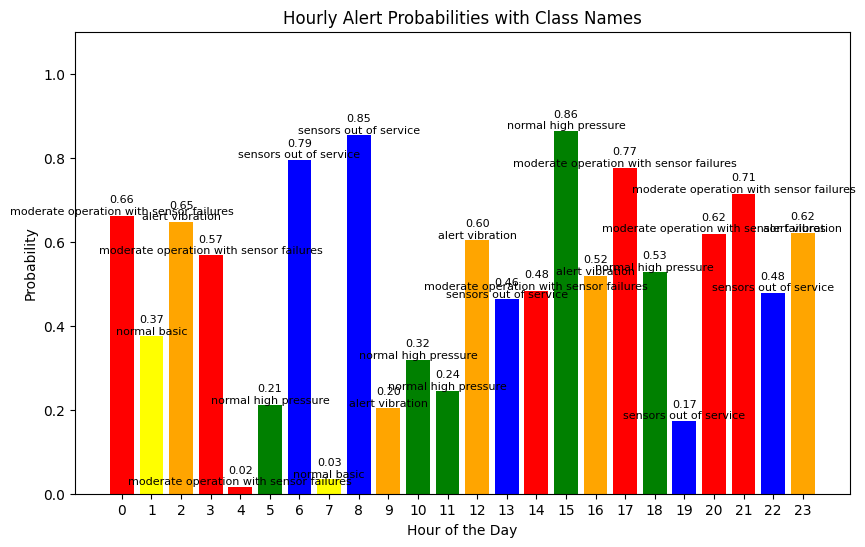

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Данные для визуализации
hours = np.arange(24)
alert_levels = np.random.randint(0, 5, size=24)  # Случайный уровень алерта для примера
probabilities = np.random.rand(24)  # Случайные вероятности для примера

# Отображение для классов с весом серьезности
class_map = {
    0: ("normal high pressure", 0),
    1: ("sensors out of service", 1),
    2: ("normal basic", 0),
    3: ("alert vibration", 2),
    4: ("moderate operation with sensor failures", 3),
    5: ("normal operation with occasional pressure peaks", 1),
    6: ("monitoring mode", 2),
    7: ("enhanced monitoring mode", 3),
    8: ("brief operational pauses", 2),
    9: ("high operational stress", 4),
    10: ("deep fluctuation tt and vt", 3),
    11: ("active synchro fluctuation of tt, vt, pt", 3),
    12: ("stopping", 2),
    13: ("short break", 1)
}

# Определение цветов в зависимости от уровня алерта
colors = ['green', 'blue', 'yellow', 'orange', 'red']
color_map = {i: colors[i] for i in range(5)}  # Сопоставление уровня алерта с цветом

# Создание столбчатой диаграммы
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(hours, probabilities, color=[color_map[level] for level in alert_levels])

# Добавление аннотаций с вероятностью алерта и названиями классов
for bar, prob, level in zip(bars, probabilities, alert_levels):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{prob:.2f}\n{class_map[level][0]}", ha='center', va='bottom', fontsize=8)  # ha: horizontal alignment

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Probability')
ax.set_title('Hourly Alert Probabilities with Class Names')
ax.set_xticks(hours)
ax.set_ylim(0, 1.1)  # Чуть выше, чтобы было место для текста

plt.show()



**У нас была еще одна модель ЛСТМ, код слетел из ноутбука из-за скачка электричества. Сравним их**

In [ ]:
import pandas as pd
from keras.models import load_model
import plotly.express as px

# Пути к моделям
old_model_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_2sensors_out_of_service.keras'
new_model_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_sensors_out_of_service.keras'

# Загрузка моделей
old_model = load_model(old_model_path)
new_model = load_model(new_model_path)

# Выполнение предсказаний
old_predictions_proba = old_model.predict(X_test_seq)
new_predictions_proba = new_model.predict(X_test_seq)

old_predicted_classes = np.argmax(old_predictions_proba, axis=1)
new_predicted_classes = np.argmax(new_predictions_proba, axis=1)

# Создание DataFrame для упрощения обработки
old_results_df = pd.DataFrame({
    'predicted_class': old_predicted_classes,
    'probability': np.max(old_predictions_proba, axis=1)
})

new_results_df = pd.DataFrame({
    'predicted_class': new_predicted_classes,
    'probability': np.max(new_predictions_proba, axis=1)
})

# Подсчет количества каждого класса для старой и новой модели
old_class_counts = old_results_df['predicted_class'].value_counts().sort_index()
new_class_counts = new_results_df['predicted_class'].value_counts().sort_index()

# Визуализация распределения классов для старой модели
fig_old = px.bar(old_class_counts, title='Distribution of Predicted Classes by Old Model', labels={'index': 'Class', 'value': 'Count'}, text_auto=True)
fig_old.update_layout(xaxis_title='Class', yaxis_title='Count')
fig_old.show()

# Визуализация распределения классов для новой модели
fig_new = px.bar(new_class_counts, title='Distribution of Predicted Classes by New Model', labels={'index': 'Class', 'value': 'Count'}, text_auto=True)
fig_new.update_layout(xaxis_title='Class', yaxis_title='Count')
fig_new.show()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


**Выставим веса для классов по степени нагрузки для оборудования (для баллов, это не балансирование классов)**

In [ ]:
# Отображение для классов с весом серьезности
class_map = {
    0: ("normal high pressure", 0),
    1: ("sensors out of service", 1),
    2: ("normal basic", 0),
    3: ("alert vibration", 2),
    4: ("moderate operation with sensor failures", 3),
    5: ("normal operation with occasional pressure peaks", 1),
    6: ("monitoring mode", 2),
    7: ("enhanced monitoring mode", 3),
    8: ("brief operational pauses", 2),
    9: ("high operational stress", 4),
    10: ("deep fluctuation tt and vt", 3),
    11: ("active synchro fluctuation of tt, vt, pt", 3),
    12: ("stopping", 2),
    13: ("short break", 1)
}


**Предикт - динамическая визуализация**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import load_model
import plotly.graph_objects as go

# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)

features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)

def create_sequences(X, y, timestamps, sequence_length=60):
    xs, ys, ts = [], [], []
    for i in range(len(X) - sequence_length + 1):
        xs.append(X.iloc[i:i + sequence_length].values)
        ys.append(y.iloc[i + sequence_length - 1])
        ts.append(timestamps[i + sequence_length - 1])
    return np.array(xs), np.array(ys), np.array(ts)

X_train_seq, y_train_seq, train_timestamps = create_sequences(X_train, y_train, timestamps_train, sequence_length=60)
X_test_seq, y_test_seq, test_timestamps = create_sequences(X_test, y_test, timestamps_test, sequence_length=60)

# Загрузка модели и выполнение предсказаний
model_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_2sensors_out_of_service.keras'
model = load_model(model_path)

predictions_proba = model.predict(X_test_seq)
predicted_classes = np.argmax(predictions_proba, axis=1)

# Определение классов алерта
alert_classes = {3, 6, 7, 9, 10, 11}  # пример для алертных классов

# Классификация важности
class_map = {
    0: ("normal high pressure", 0),
    1: ("sensors out of service", 1),
    2: ("normal basic", 0),
    3: ("alert vibration", 2),
    4: ("moderate operation with sensor failures", 3),
    5: ("normal operation with occasional pressure peaks", 1),
    6: ("monitoring mode", 2),
    7: ("enhanced monitoring mode", 3),
    8: ("brief operational pauses", 2),
    9: ("high operational stress", 4),
    10: ("deep fluctuation tt and vt", 3),
    11: ("active synchro fluctuation of tt, vt, pt", 3),
    12: ("stopping", 2),
    13: ("short break", 1)
}

# Создание DataFrame для упрощения обработки
results_df = pd.DataFrame({
    'timestamp': test_timestamps,
    'predicted_class': predicted_classes,
    'probability': np.max(predictions_proba, axis=1)
})

# Группировка по часу и расчет наиболее вероятного и наиболее опасного классов
hourly_data = results_df.groupby(results_df['timestamp'].dt.hour).apply(lambda df: pd.Series({
    'most_common_class': df['predicted_class'].mode()[0],
    'max_probability': df['probability'].max(),
    'highest_alert_class': df[df['predicted_class'].isin(alert_classes)]['predicted_class'].mode()[0] if any(df['predicted_class'].isin(alert_classes)) else df['predicted_class'].mode()[0],
    'highest_alert_probability': df[df['predicted_class'].isin(alert_classes)]['probability'].max() if any(df['predicted_class'].isin(alert_classes)) else df['probability'].max()
}))

# Инициализация фигуры
fig = go.Figure()

# Начальное состояние (первый час как пример, делаем видимым)
initial_hour = hourly_data.index[0]
fig.add_trace(go.Scatterpolar(
    r=[0, hourly_data.loc[initial_hour, 'max_probability']], theta=[0, 90],
    mode='lines+markers+text',
    name=f"Hour: {initial_hour} Most Common",
    text=f"{class_map[hourly_data.loc[initial_hour, 'most_common_class']][0]} ({hourly_data.loc[initial_hour, 'max_probability']:.2%})"
))

fig.add_trace(go.Scatterpolar(
    r=[0, hourly_data.loc[initial_hour, 'highest_alert_probability']], theta=[90, 180],
    mode='lines+markers+text',
    name=f"Hour: {initial_hour} Highest Alert",
    text=f"{class_map[hourly_data.loc[initial_hour, 'highest_alert_class']][0]} ({hourly_data.loc[initial_hour, 'highest_alert_probability']:.2%})"
))

import plotly.graph_objects as go

# Предполагаем, что hourly_data и fig уже определены

# Добавление всех кадров
frames = []
for index, row in hourly_data.iterrows():
    frame = go.Frame(
        data=[
            go.Scatterpolar(
                r=[0, row['max_probability']], theta=[0, 90],
                mode='lines+markers+text',
                text=f"{class_map[row['most_common_class']][0]} ({row['max_probability']:.2%})"
            ),
            go.Scatterpolar(
                r=[0, row['highest_alert_probability']], theta=[90, 180],
                mode='lines+markers+text',
                text=f"{class_map[row['highest_alert_class']][0]} ({row['highest_alert_probability']:.2%})"
            )
        ],
        name=str(index)  # Убедимся, что каждый кадр имеет уникальный идентификатор
    )
    frames.append(frame)

fig.frames = frames

# Настройка кнопок управления анимацией
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {'label': 'Play', 'method': 'animate', 'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300}}]},
            {'label': 'Pause', 'method': 'animate', 'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}]}
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': True,
        'x': 0.1,
        'xanchor': 'right',
        'y': 1.1,
        'yanchor': 'top'
    }]
)

# Настройка слайдеров
fig.update_layout(
    sliders=[{
        'steps': [{'label': f"Hour: {index}", 'method': 'animate', 'args': [[str(index)], {'mode': 'immediate', 'frame': {'duration': 500, 'redraw': True}, 'transition': {'duration': 300}}]} for index in hourly_data.index],
        'x': 0, 'y': 0, 'currentvalue': {'visible': True, 'prefix': 'Current hour: ', 'xanchor': 'center'},
        'len': 0.9, 'xanchor': 'left', 'yanchor': 'top'
    }]
)

# Отображение фигуры
fig.show()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


**Изменение весов классов**

Class weights: {0: 0.011940187017431873, 1: 0.030397012680548716, 2: 1255.9285714285713, 3: 2511.8571428571427, 4: 19.359207266721718, 5: 68.81800391389433, 6: 98.50420168067227, 7: 130.4860853432282, 8: 1255.9285714285713, 9: 0.4597313462104128, 10: 245.05923344947735, 11: 14.456731757451182, 12: 10047.42857142857, 13: 1674.5714285714287}


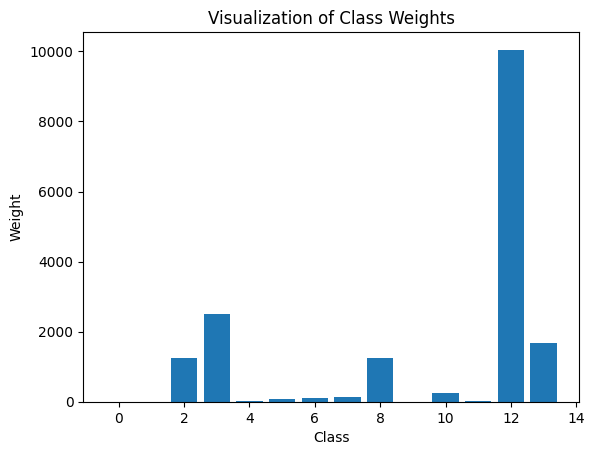

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)


features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)

# Вычисление весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Модификация весов для определенных классов
class_weight_dict[0] *= 0.1
class_weight_dict[1] *= 0.1

print("Class weights:", class_weight_dict)

# Визуализация весов классов
plt.bar(class_weight_dict.keys(), class_weight_dict.values())
plt.xlabel('Class')
plt.ylabel('Weight')
plt.title('Visualization of Class Weights')
plt.show()

# Сохранение весов в CSV
weights_df = pd.DataFrame(list(class_weight_dict.items()), columns=['Class', 'Weight'])
weights_df.to_csv('class_weights.csv', index=False)


**Тренировка с измененными весами классов**

Shape of X_train_seq: (140605, 60, 15)
Shape of y_train_seq: (140605,)


c:\Users\Admin\Desktop\myenv3.10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 57s 16ms/step - accuracy: 0.0243 - loss: 2.5614 - val_accuracy: 0.0661 - val_loss: 3.3174
Epoch 2/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 0.1755 - loss: 1.7010 - val_accuracy: 0.3789 - val_loss: 2.9669
Epoch 3/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 57s 16ms/step - accuracy: 0.3457 - loss: 1.4073 - val_accuracy: 0.3556 - val_loss: 2.7673
Epoch 4/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 0.3690 - loss: 0.8509 - val_accuracy: 0.3917 - val_loss: 2.3447
Epoch 5/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 57s 16ms/step - accuracy: 0.3844 - loss: 0.8280 - val_accuracy: 0.3571 - val_loss: 1.9389
Epoch 6/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - accuracy: 0.3895 - loss: 0.5683 - val_accuracy: 0.3931 - val_loss: 2.1536
Epoch 7/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.3946 - loss: 0.5473 - val_accuracy: 0.3922 - val_loss: 2.4533
Epoch 8/100
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 

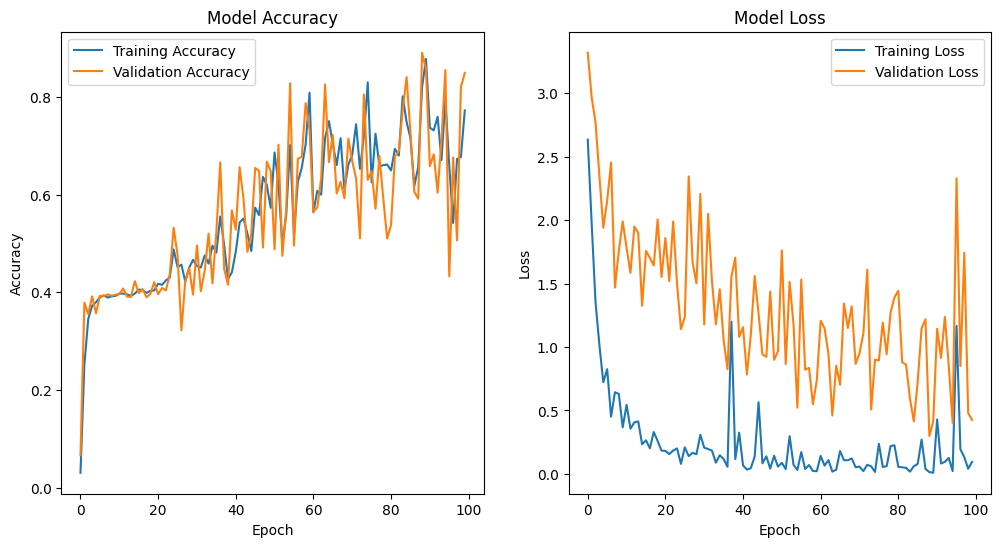

In [ ]:
# версия 2. Тренировка ЛСТМ с измененными весами классов
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)

# Выбор фичей и таргета
features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Отметка дней промывки в данных
wash_dates = [
    "2023-08-02", "2023-08-09", "2023-08-16", "2023-08-23", "2023-08-30",
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27",
    "2023-10-04", "2023-10-11", "2023-10-18", "2023-10-25",
    "2023-11-01", "2023-11-08", "2023-11-15", "2023-11-22", "2023-11-29",
    "2023-12-06", "2023-12-13", "2023-12-20", "2023-12-27"
]
wash_dates_dt = pd.to_datetime(wash_dates)
data['is_wash_day'] = pd.Index(data.index.date).isin(wash_dates_dt.date)

# Индикатор для датчиков вне сервиса
data['sensors_out_of_service'] = (data['cluster'] == 1).astype(int)

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Определение длины последовательности для LSTM
sequence_length = 60

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)

def create_sequences(X, y, timestamps, sequence_length=60):
    xs, ys, ts = [], [], []
    for i in range(len(X) - sequence_length + 1):
        xs.append(X.iloc[i:i + sequence_length].values)
        ys.append(y.iloc[i + sequence_length - 1])
        ts.append(timestamps[i + sequence_length - 1])
    return np.array(xs), np.array(ys), np.array(ts)

X_train_seq, y_train_seq, train_timestamps = create_sequences(X_train, y_train, timestamps_train, sequence_length=60)
X_test_seq, y_test_seq, test_timestamps = create_sequences(X_test, y_test, timestamps_test, sequence_length=60)

print("Shape of X_train_seq:", X_train_seq.shape)  # Должно выводить (количество, 60, 15)
print("Shape of y_train_seq:", y_train_seq.shape)  # Должно выводить (количество,)

# Модель
model = Sequential([
    LSTM(50, input_shape=(sequence_length, len(features)), return_sequences=True),
    LSTM(50),
    Dense(len(np.unique(y_train)), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




# Обучение модели с учётом весов классов
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict  # Добавляем веса классов
)

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Сохранение модели
save_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_new_weights.keras'
model.save(save_path)


**Распределение классов после тренировки с перевзвешиванием**

In [ ]:
import pandas as pd
import plotly.express as px
from keras.models import load_model

# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)


features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)

# Загрузка обученной модели
model_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_new_weights.keras'
model = load_model(model_path)


predictions = model.predict(X_test_seq)
predicted_classes = np.argmax(predictions, axis=1)

# Создание DataFrame для удобства визуализации
results_df = pd.DataFrame({
    'timestamp': test_timestamps,
    'predicted_class': predicted_classes
})
results_df.set_index('timestamp', inplace=True)

# Подсчет количества предсказаний по классам
class_counts = results_df['predicted_class'].value_counts().reset_index()
class_counts.columns = ['predicted_class', 'count']  # Правильное переименование столбцов

# Визуализация распределения предсказанных классов
fig = px.bar(
    class_counts,
    x='predicted_class',  # Убедитесь, что столбец действительно называется 'predicted_class'
    y='count',
    title='Distribution of Predicted Classes',
    labels={'predicted_class': 'Class', 'count': 'Count'},
    text='count'
)
fig.show()


print(class_counts)

1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


    predicted_class  count
0                 0  15888
1                 1   8126
2                 9   5587
3                10   3647
4                11    558
5                 3    272
6                 7    252
7                 5    225
8                 2    195
9                 6    191
10                4    143
11                8     17
12               13      6


**Визуализация предикта со днями промывки и сравнение с актуальными классами выделены одним цветом, но с разными маркерами - круги и звездочки**

1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


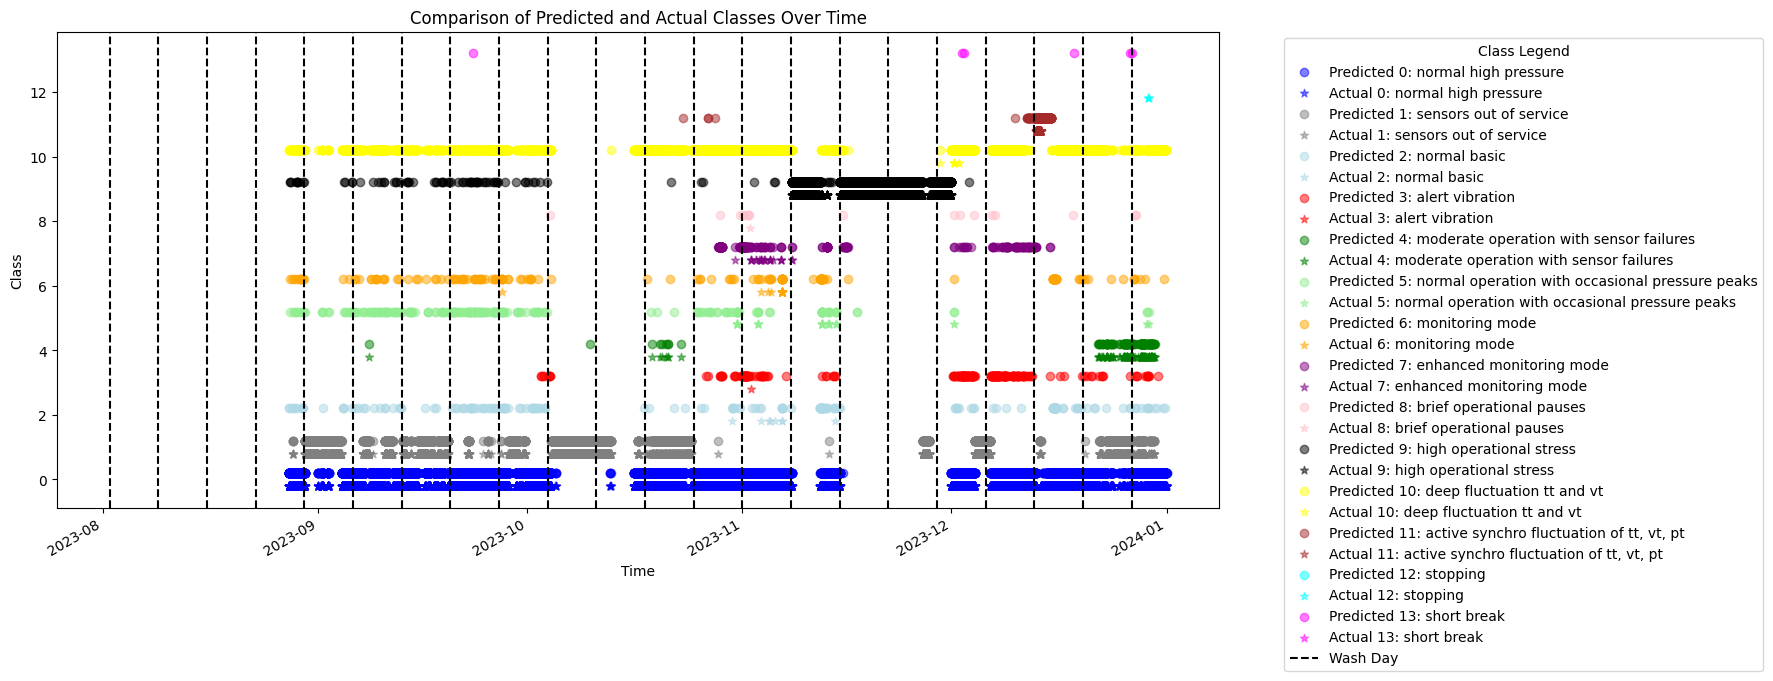

In [ ]:
import matplotlib.pyplot as plt
# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['cluster'] = data['cluster'].astype(int)

features = ['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341',
            'P3-111/A_VT_342', 'P3-111/A_VT_343', 'P3-111/B_PT_351',
            'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352',
            'P3-111/B_VT_353', 'P3-111/C_PT_361', 'P3-111/C_TT_361',
            'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']
target = 'cluster'

# Отметка дней промывки в данных
wash_dates = [
    "2023-08-02", "2023-08-09", "2023-08-16", "2023-08-23", "2023-08-30",
    "2023-09-06", "2023-09-13", "2023-09-20", "2023-09-27",
    "2023-10-04", "2023-10-11", "2023-10-18", "2023-10-25",
    "2023-11-01", "2023-11-08", "2023-11-15", "2023-11-22", "2023-11-29",
    "2023-12-06", "2023-12-13", "2023-12-20", "2023-12-27"
]
wash_dates_dt = pd.to_datetime(wash_dates)
data['is_wash_day'] = pd.Index(data.index.date).isin(wash_dates_dt.date)

# Индикатор для датчиков вне сервиса
data['sensors_out_of_service'] = (data['cluster'] == 1).astype(int)

# Разделение данных на обучающую и тестовую выборку с сохранением индекса
X = data[features]
y = data[target]
timestamps = data.index

# Определение длины последовательности для LSTM
sequence_length = 60

# Подготовка данных для модели
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.2, random_state=42
)


def create_sequences(X, y, timestamps, sequence_length=60):
    xs, ys, ts = [], [], []
    for i in range(len(X) - sequence_length + 1):  # Изменено условие для корректного создания последней последовательности
        xs.append(X.iloc[i:i + sequence_length].values)
        ys.append(y.iloc[i + sequence_length - 1])
        ts.append(timestamps[i + sequence_length - 1])  # Использование прямой индексации
    return np.array(xs), np.array(ys), np.array(ts)

X_train_seq, y_train_seq, train_timestamps = create_sequences(X_train, y_train, timestamps_train, sequence_length=60)
X_test_seq, y_test_seq, test_timestamps = create_sequences(X_test, y_test, timestamps_test, sequence_length=60)

results_df = pd.DataFrame({
    'timestamp': test_timestamps,
    'predicted_class': predicted_classes,
    'actual_class': y_test_seq  # Используем y_test_seq, который соответствует размеру X_test_seq
})
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'])
results_df.set_index('timestamp', inplace=True)

# Загрузка обученной модели и получение предсказаний
model_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\LSTM_new_weights.keras'
model = load_model(model_path)
predictions = model.predict(X_test_seq)
predicted_classes = np.argmax(predictions, axis=1)

# Визуализация
# Создание новой фигуры для избежания повторного использования старых объектов
fig, ax = plt.subplots(figsize=(15, 7))

# Сопоставление классов с цветами
color_map = {
    0: 'blue', 1: 'grey', 2: 'lightblue', 3: 'red', 4: 'green',
    5: 'lightgreen', 6: 'orange', 7: 'purple', 8: 'pink',
    9: 'black', 10: 'yellow', 11: 'brown', 12: 'cyan', 13: 'magenta'
}

# Словарь для описания классов
class_map = {
    0: "normal high pressure",
    1: "sensors out of service",
    2: "normal basic",
    3: "alert vibration",
    4: "moderate operation with sensor failures",
    5: "normal operation with occasional pressure peaks",
    6: "monitoring mode",
    7: "enhanced monitoring mode",
    8: "brief operational pauses",
    9: "high operational stress",
    10: "deep fluctuation tt and vt",
    11: "active synchro fluctuation of tt, vt, pt",
    12: "stopping",
    13: "short break"
}

# Отображение предсказанных и реальных классов
for cls in color_map:
    # Фильтрация данных по классу для предсказаний и фактических значений
    pred_data = results_df[results_df['predicted_class'] == cls]
    act_data = results_df[results_df['actual_class'] == cls]

    # Предсказанные классы
    ax.scatter(pred_data.index, [cls + 0.2] * len(pred_data), color=color_map[cls], label=f"Predicted {cls}: {class_map[cls]}", marker='o', alpha=0.5)

    # Фактические классы
    ax.scatter(act_data.index, [cls - 0.2] * len(act_data), color=color_map[cls], label=f"Actual {cls}: {class_map[cls]}", marker='*', alpha=0.5)

# Добавление дней промывки
for date in wash_dates_dt:
    ax.axvline(date, color='black', linestyle='--', label='Wash Day' if date == wash_dates_dt[0] else None)

# Настройка графика
ax.set_title('Comparison of Predicted and Actual Classes Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Class')
ax.legend(title='Class Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().autofmt_xdate()  # Автоматический поворот дат

# Отображение графика
plt.show()


**Предсказанные и актуальные классы**

In [ ]:
# содержимое DataFrame
print(results_df.head())  # Выведет первые пять строк DataFrame для проверки

# уникальные классы в предсказаниях и фактических данных
print("Unique predicted classes:", results_df['predicted_class'].unique())
print("Unique actual classes:", results_df['actual_class'].unique())


                     predicted_class  actual_class
timestamp                                         
2023-12-09 13:54:00                0             0
2023-10-29 21:31:00                0             0
2023-12-05 23:33:00                1             1
2023-11-16 08:45:00                9             9
2023-11-14 23:10:00                0             0
Unique predicted classes: [ 0  1  9 10  3  2  6 11  5  4  7  8 13]
Unique actual classes: [ 0  1  9  6  4  5 11  7  2 10 12  3  8]


**Часть 2. Предикт режимов закончен, теперь сделаем предикт коонкретных неисправностей**

**Словарь основных неисправностей (примерно 60% от общего набора - для примера)**

In [ ]:
import pandas as pd
df_dict = pd.read_csv(r"C:\Users\Admin\Desktop\Питон\Nordal\P-111\failures_dict.csv")
df_dict.head()

,pt_changes,tt_changes,vt_motor_changes_high,vt_motor_changes_critical,vt_pump_changes_high,vt_pump_changes_critical,vt_pump_changes_high.1,vt_pump_changes_critical.1,duration,pumps_falure,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,5.0,15.0,20.0,30.0,25.0,40.0,20.0,30.0,3.000,Износ вала,NaN,NaN,NaN,NaN
1,0.0,0.0,25.0,35.0,20.0,30.0,20.0,30.0,3.000,Износ Рабочего Колеса,NaN,NaN,NaN,NaN
2,10.0,0.0,25.0,35.0,30.0,40.0,30.0,40.0,2.000,Повреждение Улиты,NaN,NaN,NaN,NaN
3,0.0,0.0,30.0,50.0,25.0,40.0,25.0,40.0,0.001,Посторонние Предметы в Насосной Камере,NaN,NaN,NaN,NaN
4,0.0,0.0,30.0,50.0,25.0,40.0,25.0,40.0,0.001,Посторонние Предметы На Входе в Насос,NaN,NaN,NaN,NaN


**Вычисляем дельты после первого месяца - мин, макс, средняя для каждого из трех насосов**

In [ ]:
pump_data.head()

,P3-111/C_PT_361_delta_mean_1m,P3-111/C_PT_361_delta_min_1m,P3-111/C_PT_361_delta_max_1m,P3-111/C_PT_361_delta_mean_2m,P3-111/C_PT_361_delta_min_2m,P3-111/C_PT_361_delta_max_2m,P3-111/C_PT_361_delta_mean_3m,P3-111/C_PT_361_delta_min_3m,P3-111/C_PT_361_delta_max_3m,P3-111/C_PT_361_delta_mean_4m,...,P3-111/C_VT_362_scaled_delta_max_1m,P3-111/C_VT_362_scaled_delta_mean_2m,P3-111/C_VT_362_scaled_delta_min_2m,P3-111/C_VT_362_scaled_delta_max_2m,P3-111/C_VT_362_scaled_delta_mean_3m,P3-111/C_VT_362_scaled_delta_min_3m,P3-111/C_VT_362_scaled_delta_max_3m,P3-111/C_VT_362_scaled_delta_mean_4m,P3-111/C_VT_362_scaled_delta_min_4m,P3-111/C_VT_362_scaled_delta_max_4m
time,,,,,,,,,,,,,,,,,,,,,
2023-08-27 18:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-27 18:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-27 18:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-27 18:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-27 18:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Загрузка данных
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Начальный месяц (месяц 0)
start_period = data.index.min().to_period('M')

# Обработка данных по каждому насосу
for pump, categories in pumps_features.items():
    pump_data = pd.DataFrame(index=data.index)

    for category, features in categories.items():
        for feature in features:
            initial_stats = data[feature][data.index.to_period('M') == start_period].agg(['mean', 'min', 'max'])

            for month_offset in range(1, 5):  # Периоды для расчета от 1 до 4 месяцев
                current_period = start_period + month_offset
                if data.index.max().to_period('M') >= current_period:
                    current_data = data.loc[data.index.to_period('M') == current_period, feature]
                    if not current_data.empty:
                        pump_data[f'{feature}_delta_mean_{month_offset}m'] = current_data - initial_stats['mean']
                        pump_data[f'{feature}_delta_min_{month_offset}m'] = current_data - initial_stats['min']
                        pump_data[f'{feature}_delta_max_{month_offset}m'] = current_data - initial_stats['max']
                    print(f"{feature} for {current_period} has {len(current_data)} rows processed.")

    # Проверка содержимого перед сохранением
    if pump_data.dropna(how='all').empty:
        print(f"No valid data to save for {pump}.")
    else:
        # Сохранение данных по каждому насосу в отдельный файл
        filename = f'C:\\Users\\Admin\\Desktop\\Питон\\Nordal\\P-111\\{pump.replace("/", "_")}_classified_with_deltas.csv'
        pump_data.to_csv(filename)
        print(f"Data saved for {pump}.")




P3-111/A_PT_341 for 2023-09 has 42721 rows processed.
P3-111/A_PT_341 for 2023-10 has 39778 rows processed.
P3-111/A_PT_341 for 2023-11 has 42900 rows processed.
P3-111/A_PT_341 for 2023-12 has 44335 rows processed.
P3-111/A_TT_341 for 2023-09 has 42721 rows processed.
P3-111/A_TT_341 for 2023-10 has 39778 rows processed.
P3-111/A_TT_341 for 2023-11 has 42900 rows processed.
P3-111/A_TT_341 for 2023-12 has 44335 rows processed.
P3-111/A_VT_341 for 2023-09 has 42721 rows processed.
P3-111/A_VT_341 for 2023-10 has 39778 rows processed.
P3-111/A_VT_341 for 2023-11 has 42900 rows processed.
P3-111/A_VT_341 for 2023-12 has 44335 rows processed.
P3-111/A_VT_342 for 2023-09 has 42721 rows processed.
P3-111/A_VT_342 for 2023-10 has 39778 rows processed.
P3-111/A_VT_342 for 2023-11 has 42900 rows processed.
P3-111/A_VT_342 for 2023-12 has 44335 rows processed.
P3-111/A_VT_343 for 2023-09 has 42721 rows processed.
P3-111/A_VT_343 for 2023-10 has 39778 rows processed.
P3-111/A_VT_343 for 2023-11 

In [ ]:
pump_data.head()

,P3-111/C_PT_361_delta_mean_1m,P3-111/C_PT_361_delta_min_1m,P3-111/C_PT_361_delta_max_1m,P3-111/C_PT_361_delta_mean_2m,P3-111/C_PT_361_delta_min_2m,P3-111/C_PT_361_delta_max_2m,P3-111/C_PT_361_delta_mean_3m,P3-111/C_PT_361_delta_min_3m,P3-111/C_PT_361_delta_max_3m,P3-111/C_PT_361_delta_mean_4m,...,P3-111/C_VT_362_scaled_delta_max_1m,P3-111/C_VT_362_scaled_delta_mean_2m,P3-111/C_VT_362_scaled_delta_min_2m,P3-111/C_VT_362_scaled_delta_max_2m,P3-111/C_VT_362_scaled_delta_mean_3m,P3-111/C_VT_362_scaled_delta_min_3m,P3-111/C_VT_362_scaled_delta_max_3m,P3-111/C_VT_362_scaled_delta_mean_4m,P3-111/C_VT_362_scaled_delta_min_4m,P3-111/C_VT_362_scaled_delta_max_4m
time,,,,,,,,,,,,,,,,,,,,,
2023-09-01 07:51:00,0.451608,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.062604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 07:52:00,0.451608,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.064993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 07:53:00,0.451608,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.066918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 07:54:00,0.451608,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.063652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 07:55:00,0.451608,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.060219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Загрузка датасета
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path, index_col='time', parse_dates=True)

# Загрузка словаря неисправностей
dict_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\failures_dict.csv'
failures_dict = pd.read_csv(dict_path)

# Список датчиков для каждого насоса
pumps_features = [['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341', 'P3-111/A_VT_342', 'P3-111/A_VT_343'],
                ['P3-111/B_PT_351', 'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352', 'P3-111/B_VT_353'],
                ['P3-111/C_PT_361', 'P3-111/C_TT_361', 'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']]

# Проходим по каждому насосу
for pump_index, pump_features in enumerate(pumps_features):
    print(f"Обработка насоса #{pump_index + 1}")
    # Проходим по каждому датчику насоса
    for feature in pump_features:
        # Вычисляем среднее значение за первый месяц для каждого датчика
        first_month_mean = data[feature][data.index.month == data.index.min().month].mean()
        print(f"Среднее значение за первый месяц для {feature}: {first_month_mean}")
        # Вычисляем дельту относительно среднего значения за первый месяц
        data[feature + '_delta'] = data[feature] - first_month_mean

    # Проходим по каждой неисправности в словаре
    for failure_index, failure in failures_dict.iterrows():
        print(f"Обработка неисправности #{failure_index + 1}")

        # Определение условий для текущей неисправности
        conditions = ((data[pump_features[0]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['pt_changes']).all())) &
                    (data[pump_features[1]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['tt_changes']).all())) &
                    (data[pump_features[2]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['vt_motor_changes_high']).all())) &
                    (data[pump_features[3]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['vt_pump_changes_high']).all())) &
                    (data[pump_features[4]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['vt_pump_changes_high']).all())))

        # Применение условий к датасету
        failure_periods = data[conditions]

        # Удаление строк, где все значения равны нулю
        failure_periods = failure_periods.dropna(how='all')

        # Группировка по месяцам и подсчет количества периодов неисправности в каждом месяце
        failure_counts = failure_periods.resample('M').count()

        # Вывод размера дельты и информации о наличии неисправности
        print(f"Размер дельты для неисправности #{failure_index + 1}: {failure_counts.shape[0]}")
        if not failure_counts.empty:
            print(f"Неисправность: {failure['pumps_falure']}")
        else:
            print("Неисправность отсутствует")
        print("\n")



Обработка насоса #1
Среднее значение за первый месяц для P3-111/A_PT_341: 7.185551665501968
Среднее значение за первый месяц для P3-111/A_TT_341: 21.577414243328963
Среднее значение за первый месяц для P3-111/A_VT_341: 0.485563614021216
Среднее значение за первый месяц для P3-111/A_VT_342: 0.4444090157532262
Среднее значение за первый месяц для P3-111/A_VT_343: 0.16102678941078852
Обработка неисправности #1


TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [ ]:
import pandas as pd

# Загрузка датасета
data_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\P3-111_classified_no_junk.csv'
data = pd.read_csv(data_path, index_col='time', parse_dates=True)

# Загрузка словаря неисправностей
dict_path = r'C:\Users\Admin\Desktop\Питон\Nordal\P-111\failures_dict.csv'
failures_dict = pd.read_csv(dict_path)

# Список датчиков для каждого насоса
pumps_features = [['P3-111/A_PT_341', 'P3-111/A_TT_341', 'P3-111/A_VT_341', 'P3-111/A_VT_342', 'P3-111/A_VT_343'],
                ['P3-111/B_PT_351', 'P3-111/B_TT_351', 'P3-111/B_VT_351', 'P3-111/B_VT_352', 'P3-111/B_VT_353'],
                ['P3-111/C_PT_361', 'P3-111/C_TT_361', 'P3-111/C_VT_361', 'P3-111/C_VT_363', 'P3-111/C_VT_362_scaled']]

# Проходим по каждому насосу
for pump_index, pump_features in enumerate(pumps_features):
    print(f"Обработка насоса #{pump_index + 1}")
    # Проходим по каждому датчику насоса
    for feature in pump_features:
        # Вычисляем среднее значение за первый месяц для каждого датчика
        first_month_mean = data[feature][data.index.month == data.index.min().month].mean()
        print(f"Среднее значение за первый месяц для {feature}: {first_month_mean}")
        # Вычисляем дельту относительно среднего значения за первый месяц
        data[feature + '_delta'] = data[feature] - first_month_mean
    # Проходим по каждой неисправности в словаре
    for failure_index, failure in failures_dict.iterrows():
        print(f"Обработка неисправности #{failure_index + 1}")

        # Определение условий для текущей неисправности
conditions = ((data[pump_features[0]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['pt_changes']).all())) &
            (data[pump_features[1]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['tt_changes']).all())) &
            (data[pump_features[2]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['vt_motor_changes_high']).all())) &
            (data[pump_features[3]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['vt_pump_changes_high']).all())) &
            (data[pump_features[4]+'_delta'].rolling('43200min').apply(lambda x: (x / first_month_mean >= failure['vt_pump_changes_high']).all())))

# Применение условий к датасету
failure_periods = data[conditions]

# Удаление строк, где все значения равны нулю
failure_periods = failure_periods.dropna(how='all')

# Группировка по месяцам и подсчет количества периодов неисправности в каждом месяце
failure_counts = failure_periods.resample('M').count()

# Вывод размера дельты и информации о наличии неисправности
print(f"Размер дельты для неисправности #{failure_index + 1}: {failure_counts.shape[0]}")
if not failure_counts.empty:
    print(f"Неисправность: {failure['pumps_falure']}")
else:
    print("Неисправность отсутствует")
print("\n")


Обработка насоса #1
Среднее значение за первый месяц для P3-111/A_PT_341: 7.185551665501968
Среднее значение за первый месяц для P3-111/A_TT_341: 21.577414243328963
Среднее значение за первый месяц для P3-111/A_VT_341: 0.485563614021216
Среднее значение за первый месяц для P3-111/A_VT_342: 0.4444090157532262
Среднее значение за первый месяц для P3-111/A_VT_343: 0.16102678941078852
Обработка неисправности #1
Обработка неисправности #2
Обработка неисправности #3
Обработка неисправности #4
Обработка неисправности #5
Обработка неисправности #6
Обработка неисправности #7
Обработка неисправности #8
Обработка неисправности #9
Обработка неисправности #10
Обработка неисправности #11
Обработка неисправности #12
Обработка неисправности #13
Обработка неисправности #14
Обработка неисправности #15
Обработка неисправности #16
Обработка неисправности #17
Обработка неисправности #18
Обработка неисправности #19
Обработка неисправности #20
Обработка неисправности #21
Обработка неисправности #22
Обработка

TypeError: unsupported operand type(s) for &: 'float' and 'float'